<a href="https://colab.research.google.com/github/Raeab/ML-Playground/blob/main/Loan_Defaults_to_lend_or_not_to_lend_(Pycaret_approach).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3.0: Load data and split

In [1]:
# Importing pkgs that will be used
import pandas as pd
import numpy as np

In [2]:
# First, we'll read the provided labeled training data
df3 = pd.read_csv("https://drive.google.com/uc?export=download&id=1wOhyCnvGeY4jplxI8lZ-bbYN3zLtickf")
df3.info()

from sklearn.model_selection import train_test_split

X = df3.drop('BadCredit', axis=1) 
y = df3['BadCredit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserID             6000 non-null   object
 1   Sex                6000 non-null   object
 2   PreviousDefault    6000 non-null   int64 
 3   FirstName          6000 non-null   object
 4   LastName           6000 non-null   object
 5   NumberPets         6000 non-null   int64 
 6   PreviousAccounts   6000 non-null   int64 
 7   ResidenceDuration  6000 non-null   int64 
 8   Street             6000 non-null   object
 9   LicensePlate       6000 non-null   object
 10  BadCredit          6000 non-null   int64 
 11  Amount             6000 non-null   int64 
 12  Married            6000 non-null   int64 
 13  Duration           6000 non-null   int64 
 14  City               6000 non-null   object
 15  Purpose            6000 non-null   object
 16  DateOfBirth        6000 non-null   object


##3.0.1: EDA 

In [3]:
X_train.columns

Index(['UserID', 'Sex', 'PreviousDefault', 'FirstName', 'LastName',
       'NumberPets', 'PreviousAccounts', 'ResidenceDuration', 'Street',
       'LicensePlate', 'Amount', 'Married', 'Duration', 'City', 'Purpose',
       'DateOfBirth'],
      dtype='object')

In [4]:
X_train.shape

(4800, 16)

In [5]:
df3.isna().sum() # no missing 

UserID               0
Sex                  0
PreviousDefault      0
FirstName            0
LastName             0
NumberPets           0
PreviousAccounts     0
ResidenceDuration    0
Street               0
LicensePlate         0
BadCredit            0
Amount               0
Married              0
Duration             0
City                 0
Purpose              0
DateOfBirth          0
dtype: int64

In [6]:
print(round(df3.describe(),2)) 

       PreviousDefault  NumberPets  PreviousAccounts  ResidenceDuration  \
count          6000.00     6000.00           6000.00            6000.00   
mean              0.02        1.02              1.01               1.99   
std               0.14        0.82              1.01               1.39   
min               0.00        0.00              0.00               0.00   
25%               0.00        0.00              0.00               1.00   
50%               0.00        1.00              1.00               2.00   
75%               0.00        2.00              2.00               3.00   
max               1.00        2.00              6.00               9.00   

       BadCredit   Amount  Married  Duration  
count    6000.00  6000.00  6000.00   6000.00  
mean        0.17  3591.30     0.51     24.15  
std         0.38   427.03     0.50      9.43  
min         0.00  2158.00     0.00      6.00  
25%         0.00  3290.00     0.00     18.00  
50%         0.00  3595.00     1.00     24.

In [7]:
# Drop the features that are not useful.
X_train_ = X_train.drop(['UserID','FirstName','LastName','LicensePlate','Street','NumberPets'], axis =1)  
# Drop date of birth since it is not in the right format and it will be transformed at a later step.
X_train_r = X_train_.drop(['DateOfBirth'], axis =1) 

In [8]:
# Check the distribution of dummies before one hot encoding.
X_train_r['Sex'].value_counts()

F    3338
M    1462
Name: Sex, dtype: int64

In [9]:
X_train_r['City'].value_counts()

North Judithbury    1319
East Jill            652
New Roberttown       467
East Jessetown       341
Lake Debra           278
Robinsonshire        252
Lisatown             169
Lake Roberto         164
Ericmouth            155
North Noahstad       139
Cassandraton         130
New Kellystad         99
Lake Chad             97
Herrerafurt           96
Ramirezstad           94
Port Keith            91
Port Jesseville       70
New Jessica           67
West Michael          64
Jacquelineland        56
Name: City, dtype: int64

In [10]:
X_train_r['Purpose'].value_counts()

NewCar       1455
UsedCar      1102
Other         740
Household     478
Vacation      350
Repair        348
Education     258
Business       69
Name: Purpose, dtype: int64

In [11]:
# Lets do OHE for categoricals.
X_train_r = pd.get_dummies(X_train_r, drop_first= True) 
X_train_r.dtypes

PreviousDefault          int64
PreviousAccounts         int64
ResidenceDuration        int64
Amount                   int64
Married                  int64
Duration                 int64
Sex_M                    uint8
City_East Jessetown      uint8
City_East Jill           uint8
City_Ericmouth           uint8
City_Herrerafurt         uint8
City_Jacquelineland      uint8
City_Lake Chad           uint8
City_Lake Debra          uint8
City_Lake Roberto        uint8
City_Lisatown            uint8
City_New Jessica         uint8
City_New Kellystad       uint8
City_New Roberttown      uint8
City_North Judithbury    uint8
City_North Noahstad      uint8
City_Port Jesseville     uint8
City_Port Keith          uint8
City_Ramirezstad         uint8
City_Robinsonshire       uint8
City_West Michael        uint8
Purpose_Education        uint8
Purpose_Household        uint8
Purpose_NewCar           uint8
Purpose_Other            uint8
Purpose_Repair           uint8
Purpose_UsedCar          uint8
Purpose_

In [12]:
pd.set_option('display.max_columns', None)
X_train_r

,PreviousDefault,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,Sex_M,City_East Jessetown,City_East Jill,City_Ericmouth,City_Herrerafurt,City_Jacquelineland,City_Lake Chad,City_Lake Debra,City_Lake Roberto,City_Lisatown,City_New Jessica,City_New Kellystad,City_New Roberttown,City_North Judithbury,City_North Noahstad,City_Port Jesseville,City_Port Keith,City_Ramirezstad,City_Robinsonshire,City_West Michael,Purpose_Education,Purpose_Household,Purpose_NewCar,Purpose_Other,Purpose_Repair,Purpose_UsedCar,Purpose_Vacation
3897,0,0,2,3329,0,12,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5628,0,2,2,2996,0,36,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1756,0,0,3,2470,0,24,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2346,0,1,2,3745,0,30,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2996,0,1,3,3549,0,36,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,1,1,3607,1,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
5191,0,1,0,3186,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
5226,0,1,3,2387,1,36,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5390,0,1,3,3620,0,12,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


#### Visual check

In [13]:
Num_feat = ['Amount','PreviousAccounts','ResidenceDuration','Duration']
X_train_r_num = X_train_r[Num_feat]

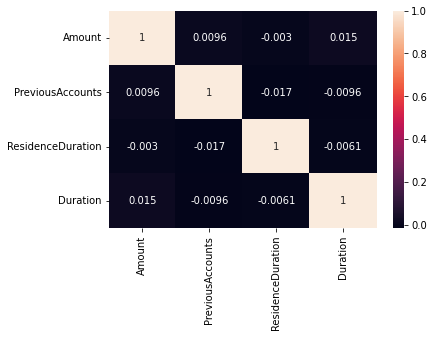

In [14]:
# Checking correlation using heatmap.
import seaborn 
seaborn.heatmap(X_train_r_num.corr(), annot=True)

In [15]:
data = pd.concat((X_train_r,y_train), axis = 1)
data

,PreviousDefault,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,Sex_M,City_East Jessetown,City_East Jill,City_Ericmouth,City_Herrerafurt,City_Jacquelineland,City_Lake Chad,City_Lake Debra,City_Lake Roberto,City_Lisatown,City_New Jessica,City_New Kellystad,City_New Roberttown,City_North Judithbury,City_North Noahstad,City_Port Jesseville,City_Port Keith,City_Ramirezstad,City_Robinsonshire,City_West Michael,Purpose_Education,Purpose_Household,Purpose_NewCar,Purpose_Other,Purpose_Repair,Purpose_UsedCar,Purpose_Vacation,BadCredit
3897,0,0,2,3329,0,12,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5628,0,2,2,2996,0,36,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1756,0,0,3,2470,0,24,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2346,0,1,2,3745,0,30,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2996,0,1,3,3549,0,36,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,1,1,3607,1,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5191,0,1,0,3186,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5226,0,1,3,2387,1,36,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5390,0,1,3,3620,0,12,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## 3.1: Baseline model 
## Let's use pycaret to process the data and choose the best model.

In [16]:
from pycaret.classification import *
exp1 = setup(data, target = 'BadCredit')

,Description,Value
0,session_id,2031
1,Target,BadCredit
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(4800, 34)"
5,Missing Values,False
6,Numeric Features,28
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='BadCredit',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_st...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [17]:
# compare all ML models to get the best result
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8351,0.8353,0.2249,0.5464,0.3144,0.2388,0.2712,0.043
lr,Logistic Regression,0.8339,0.8321,0.2039,0.5477,0.2943,0.2208,0.2576,0.417
ada,Ada Boost Classifier,0.8333,0.8323,0.2495,0.5282,0.3370,0.2551,0.2798,0.195
gbc,Gradient Boosting Classifier,0.8321,0.8361,0.2320,0.5292,0.3197,0.2395,0.2680,0.414
ridge,Ridge Classifier,0.8309,0.0000,0.0667,0.5176,0.1172,0.0814,0.1367,0.020
dummy,Dummy Classifier,0.8306,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.014
rf,Random Forest Classifier,0.8238,0.8023,0.1618,0.4631,0.2363,0.1617,0.1925,0.433
lightgbm,Light Gradient Boosting Machine,0.8220,0.8170,0.2722,0.4622,0.3417,0.2465,0.2587,0.152
et,Extra Trees Classifier,0.8199,0.7609,0.1318,0.4059,0.1986,0.1257,0.1515,0.463
knn,K Neighbors Classifier,0.8196,0.7657,0.3058,0.4546,0.3631,0.2633,0.2714,0.053


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
INFO:logs:compare_models() succesfully completed......................................


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

### Bad result's from all the models.

## 3.2: Feature engineering

In [18]:
# 1st Feature, age 
# Convert date of birth to age.
dateofb = pd.to_datetime(X_train_['DateOfBirth'])
born_year = dateofb.dt.year
from datetime import date 
today = date.today()
born_year = dateofb.dt.year
age_train = today.year - born_year
age_train

3897    53
5628    59
1756    48
2346    46
2996    47
        ..
3772    50
5191    50
5226    54
5390    56
860     35
Name: DateOfBirth, Length: 4800, dtype: int64

In [19]:
X_train.columns

Index(['UserID', 'Sex', 'PreviousDefault', 'FirstName', 'LastName',
       'NumberPets', 'PreviousAccounts', 'ResidenceDuration', 'Street',
       'LicensePlate', 'Amount', 'Married', 'Duration', 'City', 'Purpose',
       'DateOfBirth'],
      dtype='object')

In [20]:
X_train_r2 = X_train.drop(['DateOfBirth','UserID','FirstName','LastName','LicensePlate','Street','NumberPets'], axis = True) 
X_train_r2
X_train_r2a = X_train_r2.join(age_train)
X_train_r2a
X_train_r2a = X_train_r2a.rename(columns = {"DateOfBirth": "Age"})
X_train_r2a.head(5)

,Sex,PreviousDefault,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,City,Purpose,Age
3897,M,0,0,2,3329,0,12,New Roberttown,Household,53
5628,F,0,2,2,2996,0,36,Ericmouth,Household,59
1756,F,0,0,3,2470,0,24,East Jill,NewCar,48
2346,F,0,1,2,3745,0,30,Lake Debra,UsedCar,46
2996,M,0,1,3,3549,0,36,North Judithbury,Vacation,47


In [21]:
#Feature 2, Selecting the top 10 cities and joining the remaining as Others. 
top10 = X_train_r2a['City'].value_counts().nlargest(10).index
top10

Index(['North Judithbury', 'East Jill', 'New Roberttown', 'East Jessetown',
       'Lake Debra', 'Robinsonshire', 'Lisatown', 'Lake Roberto', 'Ericmouth',
       'North Noahstad'],
      dtype='object')

In [22]:
X_train_r2a['City'] = X_train_r2a['City'].where(X_train_r2a['City'].isin(top10), 'Others')
X_train_r2a['City'].value_counts()

North Judithbury    1319
Others               864
East Jill            652
New Roberttown       467
East Jessetown       341
Lake Debra           278
Robinsonshire        252
Lisatown             169
Lake Roberto         164
Ericmouth            155
North Noahstad       139
Name: City, dtype: int64

In [23]:
#OHE dummies 
X_train_r2a = pd.get_dummies(X_train_r2a, drop_first= True)

In [24]:
X_train_r2a.head(5)

,PreviousDefault,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,Age,Sex_M,City_East Jill,City_Ericmouth,...,City_North Noahstad,City_Others,City_Robinsonshire,Purpose_Education,Purpose_Household,Purpose_NewCar,Purpose_Other,Purpose_Repair,Purpose_UsedCar,Purpose_Vacation
3897,0,0,2,3329,0,12,53,1,0,0,...,0,0,0,0,1,0,0,0,0,0
5628,0,2,2,2996,0,36,59,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1756,0,0,3,2470,0,24,48,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2346,0,1,2,3745,0,30,46,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2996,0,1,3,3549,0,36,47,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [25]:
# Feature 3, Standardization using yeo-johnson on all numerical features except age.
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
scaler.fit(X_train_r2a[Num_feat])
X_train_r2a[Num_feat] = scaler.transform(X_train_r2a[Num_feat])   

In [26]:
X_train_r2a.head(5)

,PreviousDefault,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,Age,Sex_M,City_East Jill,City_Ericmouth,...,City_North Noahstad,City_Others,City_Robinsonshire,Purpose_Education,Purpose_Household,Purpose_NewCar,Purpose_Other,Purpose_Repair,Purpose_UsedCar,Purpose_Vacation
3897,0,-1.200668,0.15345,-0.636222,0,-1.306903,53,1,0,0,...,0,0,0,0,1,0,0,0,0,0
5628,0,1.067827,0.15345,-1.399143,0,1.319214,59,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1756,0,-1.200668,0.79406,-2.566062,0,-0.096777,48,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2346,0,0.280965,0.15345,0.340515,0,0.589447,46,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2996,0,0.280965,0.79406,-0.122816,0,1.319214,47,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
data2 = pd.concat((X_train_r2a,y_train), axis=1)

In [28]:
exp2 = setup(data2, target = 'BadCredit')

,Description,Value
0,session_id,3860
1,Target,BadCredit
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(4800, 26)"
5,Missing Values,False
6,Numeric Features,23
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='BadCredit',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_st...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [29]:
# compare all ML models to get the best result
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8913,0.9264,0.5852,0.7447,0.6519,0.5890,0.5970,0.028
lr,Logistic Regression,0.8902,0.9275,0.5784,0.7433,0.6470,0.5835,0.5920,0.202
ada,Ada Boost Classifier,0.8857,0.9228,0.5869,0.7142,0.6422,0.5751,0.5803,0.321
ridge,Ridge Classifier,0.8779,0.0000,0.4168,0.7892,0.5441,0.4814,0.5148,0.015
gbc,Gradient Boosting Classifier,0.8774,0.9228,0.5971,0.6710,0.6307,0.5576,0.5597,0.399
rf,Random Forest Classifier,0.8750,0.9070,0.5170,0.6954,0.5916,0.5197,0.5286,0.581
svm,SVM - Linear Kernel,0.8705,0.0000,0.5043,0.7310,0.5546,0.4871,0.5208,0.036
lightgbm,Light Gradient Boosting Machine,0.8666,0.9118,0.5596,0.6365,0.5938,0.5147,0.5173,0.089
et,Extra Trees Classifier,0.8625,0.8957,0.3862,0.6912,0.4932,0.4216,0.4465,0.390
knn,K Neighbors Classifier,0.8619,0.8608,0.4950,0.6360,0.5563,0.4761,0.4815,0.069


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
INFO:logs:compare_models() succesfully completed......................................


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

## Much better result's after feature engineering.

## 3.4: Hyperparameter tuning

#### Lets tune top 5 models.

In [30]:
# Create a model Linear Discriminant Analysis
exp_lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8810,0.8972,0.4746,0.7568,0.5833,0.5181,0.5373
1,0.8750,0.9206,0.4915,0.7073,0.5800,0.5094,0.5210
2,0.8929,0.9367,0.5763,0.7556,0.6538,0.5918,0.5994
3,0.8839,0.9219,0.5424,0.7273,0.6214,0.5545,0.5629
4,0.9018,0.9310,0.5593,0.8250,0.6667,0.6115,0.6274
5,0.8780,0.9449,0.6102,0.6667,0.6372,0.5640,0.5648
6,0.8839,0.9073,0.6949,0.6613,0.6777,0.6070,0.6072
7,0.9048,0.9367,0.6271,0.7872,0.6981,0.6424,0.6483
8,0.9018,0.9289,0.5862,0.7907,0.6733,0.6170,0.6265


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
INFO:logs:create_model() succesfully completed......................................


In [31]:
# let's save the result to compare later 
lda_base = 0.6519

In [32]:
# Tune LDA
tuned_exp_lda = tune_model(exp_lda, optimize = 'F1') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8839,0.8966,0.4915,0.7632,0.5979,0.5338,0.5515
1,0.8780,0.9216,0.4915,0.7250,0.5859,0.5174,0.5308
2,0.8899,0.9371,0.5763,0.7391,0.6476,0.5835,0.5899
3,0.8810,0.9219,0.5424,0.7111,0.6154,0.5465,0.5535
4,0.9077,0.9315,0.5763,0.8500,0.6869,0.6351,0.6516
5,0.8810,0.9440,0.6102,0.6792,0.6429,0.5717,0.5729
6,0.8869,0.9095,0.6949,0.6721,0.6833,0.6145,0.6146
7,0.9048,0.9373,0.6271,0.7872,0.6981,0.6424,0.6483
8,0.9077,0.9299,0.5862,0.8293,0.6869,0.6346,0.6478


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.005,
                           solver='lsqr', store_covariance=False, tol=0.0001)
INFO:logs:tune_model() succesfully completed......................................


In [33]:
# let's save the result to compare later 
lda_tunned = 0.6566

In [34]:
# Create a model Logistic Regression
exp_lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8839,0.9009,0.4746,0.7778,0.5895,0.5265,0.5483
1,0.8780,0.9254,0.4915,0.7250,0.5859,0.5174,0.5308
2,0.8899,0.9375,0.5593,0.7500,0.6408,0.5774,0.5860
3,0.8839,0.9227,0.5593,0.7174,0.6286,0.5610,0.5671
4,0.9018,0.9351,0.5593,0.8250,0.6667,0.6115,0.6274
5,0.8810,0.9417,0.5763,0.6939,0.6296,0.5594,0.5629
6,0.8780,0.9089,0.6949,0.6406,0.6667,0.5921,0.5929
7,0.8958,0.9368,0.5932,0.7609,0.6667,0.6061,0.6127
8,0.9018,0.9292,0.6034,0.7778,0.6796,0.6227,0.6297


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3860, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [35]:
# let's save the result to compare later 
lr_base = 0.6470

In [36]:
# Tune LR
tuned_exp_lr = tune_model(exp_lr, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8244,0.9020,0.7627,0.5000,0.6040,0.4974,0.5157
1,0.8363,0.9278,0.9153,0.5192,0.6626,0.5651,0.6047
2,0.8542,0.9363,0.8475,0.5556,0.6711,0.5826,0.6040
3,0.8542,0.9216,0.8475,0.5556,0.6711,0.5826,0.6040
4,0.8601,0.9359,0.8305,0.5698,0.6759,0.5906,0.6076
5,0.8571,0.9411,0.8644,0.5604,0.6800,0.5934,0.6164
6,0.8214,0.9096,0.8475,0.4950,0.6250,0.5182,0.5504
7,0.8393,0.9343,0.8475,0.5263,0.6494,0.5524,0.5787
8,0.8601,0.9284,0.8276,0.5647,0.6713,0.5865,0.6038


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:LogisticRegression(C=3.406, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3860, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [37]:
# let's save the result to compare later 
lr_tunned = 0.6581

In [38]:
# Create a model Gradient Boosting Classifier
exp_gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8601,0.8960,0.5424,0.6154,0.5766,0.4932,0.4946
1,0.8631,0.9163,0.5593,0.6226,0.5893,0.5074,0.5085
2,0.8899,0.9312,0.6102,0.7200,0.6606,0.5954,0.5983
3,0.8750,0.9193,0.5763,0.6667,0.6182,0.5439,0.5460
4,0.8780,0.9436,0.5254,0.7045,0.6019,0.5317,0.5397
5,0.8601,0.9325,0.5763,0.6071,0.5913,0.5070,0.5072
6,0.8482,0.8987,0.6102,0.5625,0.5854,0.4927,0.4933
7,0.9018,0.9364,0.6780,0.7407,0.7080,0.6491,0.6500
8,0.8958,0.9336,0.6207,0.7347,0.6729,0.6115,0.6145


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=3860, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [39]:
# let's save the result to compare later 
gbc_base = 0.6307

In [40]:
# Tune gbc
tuned_exp_gbc = tune_model(exp_gbc, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8780,0.8970,0.4746,0.7368,0.5773,0.5099,0.5268
1,0.8631,0.9227,0.4407,0.6667,0.5306,0.4544,0.4677
2,0.8929,0.9264,0.5424,0.7805,0.6400,0.5794,0.5927
3,0.8810,0.9206,0.5254,0.7209,0.6078,0.5397,0.5491
4,0.8929,0.9444,0.4915,0.8286,0.6170,0.5594,0.5852
5,0.8810,0.9280,0.6102,0.6792,0.6429,0.5717,0.5729
6,0.8690,0.8992,0.5593,0.6471,0.6000,0.5222,0.5242
7,0.9077,0.9363,0.6610,0.7800,0.7156,0.6610,0.6642
8,0.8869,0.9298,0.5172,0.7500,0.6122,0.5486,0.5616


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.3, loss='deviance', max_depth=3,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.3, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=4,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=3860, subsample=0.6, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [41]:
# let's save the result to compare later 
gbc_tunned = 0.6260

In [42]:
# Create a model Ada Boost Classifier
exp_ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8780,0.8965,0.4746,0.7368,0.5773,0.5099,0.5268
1,0.8720,0.9204,0.5593,0.6600,0.6055,0.5297,0.5323
2,0.8929,0.9418,0.6102,0.7347,0.6667,0.6035,0.6072
3,0.8750,0.9235,0.5424,0.6809,0.6038,0.5307,0.5355
4,0.8988,0.9378,0.6102,0.7660,0.6792,0.6201,0.6257
5,0.8780,0.9250,0.5763,0.6800,0.6239,0.5516,0.5543
6,0.8601,0.8977,0.6271,0.5968,0.6116,0.5263,0.5266
7,0.8958,0.9371,0.6102,0.7500,0.6729,0.6117,0.6163
8,0.8958,0.9319,0.5690,0.7674,0.6535,0.5938,0.6030


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=3860)
INFO:logs:create_model() succesfully completed......................................


In [43]:
# let's save the result to compare later 
ada_base = 0.6422

In [44]:
# Tune ada
tuned_exp_ada = tune_model(exp_ada, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8780,0.8997,0.4915,0.7250,0.5859,0.5174,0.5308
1,0.8810,0.9231,0.6102,0.6792,0.6429,0.5717,0.5729
2,0.8988,0.9428,0.6441,0.7451,0.6909,0.6308,0.6332
3,0.8720,0.9250,0.5424,0.6667,0.5981,0.5230,0.5269
4,0.8958,0.9350,0.6102,0.7500,0.6729,0.6117,0.6163
5,0.8780,0.9383,0.5763,0.6800,0.6239,0.5516,0.5543
6,0.8690,0.9022,0.6610,0.6190,0.6393,0.5594,0.5599
7,0.8929,0.9361,0.6271,0.7255,0.6727,0.6091,0.6114
8,0.8988,0.9348,0.6034,0.7609,0.6731,0.6142,0.6199


INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 10
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.5,
                   n_estimators=140, random_state=3860)
INFO:logs:tune_model() succesfully completed......................................


In [45]:
# let's save the result to compare later 
ada_tunned = 0.6527

In [46]:
# Create a model Ridge Classifier	
exp_ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8780,0.0,0.3729,0.8462,0.5176,0.4596,0.5104
1,0.8631,0.0,0.3729,0.7097,0.4889,0.4186,0.4475
2,0.8690,0.0,0.3898,0.7419,0.5111,0.4438,0.4745
3,0.8690,0.0,0.3898,0.7419,0.5111,0.4438,0.4745
4,0.8780,0.0,0.3898,0.8214,0.5287,0.4687,0.5118
5,0.8988,0.0,0.5085,0.8571,0.6383,0.5839,0.6108
6,0.8631,0.0,0.4407,0.6667,0.5306,0.4544,0.4677
7,0.8810,0.0,0.4068,0.8276,0.5455,0.4860,0.5267
8,0.8929,0.0,0.4483,0.8667,0.5909,0.5363,0.5750


INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 11
INFO:logs:RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=3860,
                solver='auto', tol=0.001)
INFO:logs:create_model() succesfully completed......................................


In [47]:
# let's save the result to compare later 
ridge_base = 0.5441

In [48]:
# Tune ridge
tuned_exp_ridge = tune_model(exp_ridge, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8780,0.0,0.3729,0.8462,0.5176,0.4596,0.5104
1,0.8601,0.0,0.3559,0.7000,0.4719,0.4010,0.4316
2,0.8661,0.0,0.3898,0.7188,0.5055,0.4358,0.4632
3,0.8690,0.0,0.3898,0.7419,0.5111,0.4438,0.4745
4,0.8780,0.0,0.3898,0.8214,0.5287,0.4687,0.5118
5,0.8988,0.0,0.5085,0.8571,0.6383,0.5839,0.6108
6,0.8631,0.0,0.4407,0.6667,0.5306,0.4544,0.4677
7,0.8810,0.0,0.4068,0.8276,0.5455,0.4860,0.5267
8,0.8929,0.0,0.4483,0.8667,0.5909,0.5363,0.5750


INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 12
INFO:logs:RidgeClassifier(alpha=8.51, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=3860,
                solver='auto', tol=0.001)
INFO:logs:tune_model() succesfully completed......................................


In [49]:
# let's save the result to compare later 
ridge_tunned = 0.5402

#### Comparing results to choose the better model

In [50]:
print(f'LDA Base: {lda_base}')
print(f'LDA tunned: {lda_tunned}')
print(f'LR base: {lr_base}')
print(f'LR tunned: {lr_tunned}')
print(f'GBC base: {gbc_base}')
print(f'GBC tunned: {gbc_tunned}')
print(f'Ada base: {ada_base}')
print(f'Ada tunned: {ada_tunned}')
print(f'Ridge base: {ridge_base}')
print(f'Ridge tunned: {ridge_tunned}')

LDA Base: 0.6519
LDA tunned: 0.6566
LR base: 0.647
LR tunned: 0.6581
GBC base: 0.6307
GBC tunned: 0.626
Ada base: 0.6422
Ada tunned: 0.6527
Ridge base: 0.5441
Ridge tunned: 0.5402


#### Logistic Regression tunned gives us the best result with F1 score of 0.66

## 3.5: Performance estimation

## 3.5.1 Pre-processing

In [51]:
# Drop the variables that are not useful.
X_test_ = X_test.drop(['UserID','FirstName','LastName','LicensePlate','Street','NumberPets'], axis =1)
X_test_r = X_test_.drop(['DateOfBirth'], axis =1)

In [52]:
# Convert date of birth to age.
X_test_
dateofbt = pd.to_datetime(X_test_['DateOfBirth'])
born_yeart = dateofbt.dt.year
from datetime import date 
today = date.today()
born_yeart = dateofbt.dt.year
age_test = today.year - born_yeart
age_test

X_test_r2 = X_test_r.join(age_test) 
X_test_r2

X_test_r2 = X_test_r2.rename(columns = {"DateOfBirth": "Age"})
X_test_r2.head(5)

,Sex,PreviousDefault,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,City,Purpose,Age
1782,F,0,1,3,3773,0,36,North Judithbury,NewCar,53
3917,F,0,0,3,3412,0,24,Lake Roberto,UsedCar,60
221,F,0,2,0,4146,0,24,West Michael,NewCar,53
2135,M,0,1,1,3608,1,30,East Jessetown,UsedCar,60
5224,F,0,1,1,2947,1,24,North Judithbury,NewCar,45


In [53]:
# Declaring top 10 cities.
top10t = X_test_r2['City'].value_counts().nlargest(10).index
top10t

Index(['North Judithbury', 'East Jill', 'New Roberttown', 'East Jessetown',
       'Lake Debra', 'Robinsonshire', 'Ericmouth', 'Lisatown',
       'North Noahstad', 'Lake Roberto'],
      dtype='object')

In [54]:
X_test_r2['City'] = X_test_r2['City'].where(X_test_r2['City'].isin(top10t), 'Others')
X_test_r2['City'].value_counts()

North Judithbury    332
Others              221
East Jill           169
New Roberttown      126
East Jessetown       80
Lake Debra           58
Robinsonshire        53
Ericmouth            47
Lisatown             44
North Noahstad       36
Lake Roberto         34
Name: City, dtype: int64

In [55]:
X_test_r2 = pd.get_dummies(X_test_r2, drop_first=True)  
X_test_r2.dtypes

PreviousDefault          int64
PreviousAccounts         int64
ResidenceDuration        int64
Amount                   int64
Married                  int64
Duration                 int64
Age                      int64
Sex_M                    uint8
City_East Jill           uint8
City_Ericmouth           uint8
City_Lake Debra          uint8
City_Lake Roberto        uint8
City_Lisatown            uint8
City_New Roberttown      uint8
City_North Judithbury    uint8
City_North Noahstad      uint8
City_Others              uint8
City_Robinsonshire       uint8
Purpose_Education        uint8
Purpose_Household        uint8
Purpose_NewCar           uint8
Purpose_Other            uint8
Purpose_Repair           uint8
Purpose_UsedCar          uint8
Purpose_Vacation         uint8
dtype: object

In [56]:
scaler.fit(X_test_r2[Num_feat])
X_test_r2[Num_feat] = scaler.transform(X_test_r2[Num_feat])   

In [57]:
X_test_r2.head(5)

,PreviousDefault,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,Age,Sex_M,City_East Jill,City_Ericmouth,...,City_North Noahstad,City_Others,City_Robinsonshire,Purpose_Education,Purpose_Household,Purpose_NewCar,Purpose_Other,Purpose_Repair,Purpose_UsedCar,Purpose_Vacation
1782,0,0.262137,0.809871,0.441815,0,1.349285,53,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3917,0,-1.188475,0.809871,-0.396003,0,-0.012271,60,0,0,0,...,0,0,0,0,0,0,0,0,1,0
221,0,1.048009,-1.753005,1.341233,0,-0.012271,53,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2135,0,0.262137,-0.646773,0.054775,1,0.652854,60,1,0,0,...,0,0,0,0,0,0,0,0,1,0
5224,0,0.262137,-0.646773,-1.424494,1,-0.012271,45,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Prediction 

In [58]:
# storing the tunned parameters to variable param
Param = tuned_exp_lr.get_params()
Param

{'C': 3.406,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 3860,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [59]:
# fitting the model
from sklearn.linear_model import LogisticRegression
best_rs = LogisticRegression(**Param)
best_rs= best_rs.fit(X_train_r2a, y_train)

In [60]:
# Finally the report on test 
from sklearn.metrics import classification_report 
y_pred_rs =best_rs.predict(X_test_r2)
print(classification_report(y_test, y_pred_rs))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91       991
           1       0.55      0.86      0.67       209

    accuracy                           0.85      1200
   macro avg       0.76      0.86      0.79      1200
weighted avg       0.89      0.85      0.87      1200



#### Even better F1-score on the test set of 0.8 from 0.66 on the training set. That said this is not better than the results of the decision tree model.  